In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src import preprocess
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.utils import to_categorical
from keras.models import load_model
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [4]:
donor = pd.read_csv('./PreprocessData/donor.csv')
donor_y = donor.Class
donor_X = donor.drop('Class', axis=1)

In [6]:
seq_to_Vmatrix = []
for i in range(len(donor_X)):
    seq_to_Vmatrix.append(preprocess.transform_seq_to_Vmatrix(donor_X.at[i, 'Seq']))

In [7]:
seq_to_Vmatrix = np.asarray(seq_to_Vmatrix)

In [8]:
# Splitting data
Xv_train, xv_test, Yv_train, yv_test = train_test_split(seq_to_Vmatrix, donor_y, test_size=0.2, random_state=0)

# Reshaping data
Xv_train = Xv_train.reshape(Xv_train.shape[0], Xv_train.shape[1], Xv_train.shape[2], 1)
xv_test = xv_test.reshape(xv_test.shape[0], xv_test.shape[1], xv_test.shape[2], 1)

Yv_train = to_categorical(Yv_train, 2)

## Loading Models

In [10]:
donor_Vmodel_1 = load_model('./Models/baseline_model_1.hf5')
donor_Vmodel_2 = load_model('./Models/baseline_model_2.hf5')
donor_Vmodel_3 = load_model('./Models/baseline_model_3.hf5')

In [11]:
early_stopping = EarlyStopping()

In [25]:
donor_Vmodel_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 1, 70)         910       
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 1, 70)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 1, 100)        21100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 1, 100)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 1, 100)        30100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 1, 100)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 17, 1, 100)        0         
__________

In [12]:
# Recompiling 1st CNN model of Donor Sequences
donor_Vmodel_1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
donor_Vmodel_1_history = donor_Vmodel_1.fit(Xv_train, Yv_train, batch_size=64, epochs=30,
                                            validation_split=0.2, callbacks=[early_stopping])

Train on 285622 samples, validate on 71406 samples
Epoch 1/30
285622/285622 [==============================] - 377s 1ms/step - loss: 0.1772 - acc: 0.9350 - val_loss: 0.1418 - val_acc: 0.9482
Epoch 2/30
285622/285622 [==============================] - 381s 1ms/step - loss: 0.1615 - acc: 0.9421 - val_loss: 0.1441 - val_acc: 0.9501


In [26]:
donor_Vmodel_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 36, 1, 70)         1470      
_________________________________________________________________
dropout_6 (Dropout)          (None, 36, 1, 70)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 1, 100)        21100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 34, 1, 100)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1741312   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
__________

In [13]:
# Recompiling 2nd CNN model of Donor Sequences
donor_Vmodel_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
donor_Vmodel_2_history = donor_Vmodel_2.fit(Xv_train, Yv_train, batch_size=64, epochs=30,
                                            validation_split=0.2, callbacks=[early_stopping])

Train on 285622 samples, validate on 71406 samples
Epoch 1/30
285622/285622 [==============================] - 364s 1ms/step - loss: 0.5426 - acc: 0.9194 - val_loss: 0.1449 - val_acc: 0.9466
Epoch 2/30
285622/285622 [==============================] - 365s 1ms/step - loss: 0.1504 - acc: 0.9474 - val_loss: 0.1355 - val_acc: 0.9527
Epoch 3/30
285622/285622 [==============================] - 366s 1ms/step - loss: 0.1514 - acc: 0.9463 - val_loss: 0.1367 - val_acc: 0.9516


In [27]:
donor_Vmodel_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40, 4, 128)        256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 40962     
Total params: 41,218
Trainable params: 41,218
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Recompiling Simple Neural Network of Donor Sequences
donor_Vmodel_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
donor_Vmodel_3_history = donor_Vmodel_3.fit(Xv_train, Yv_train, batch_size=64, epochs=30,
                                            validation_split=0.2, callbacks=[early_stopping])

Train on 285622 samples, validate on 71406 samples
Epoch 1/30
285622/285622 [==============================] - 131s 460us/step - loss: 0.1913 - acc: 0.9288 - val_loss: 0.1807 - val_acc: 0.9326
Epoch 2/30
285622/285622 [==============================] - 131s 457us/step - loss: 0.1810 - acc: 0.9339 - val_loss: 0.1757 - val_acc: 0.9349
Epoch 3/30
285622/285622 [==============================] - 130s 454us/step - loss: 0.1796 - acc: 0.9346 - val_loss: 0.1778 - val_acc: 0.9338


## Plotting Graphs

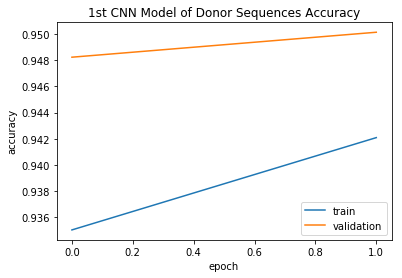

In [15]:
%matplotlib inline

# summarize history for accuracy
plt.plot(donor_Vmodel_1_history.history['acc'])
plt.plot(donor_Vmodel_1_history.history['val_acc'])
plt.title('1st CNN Model of Donor Sequences Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

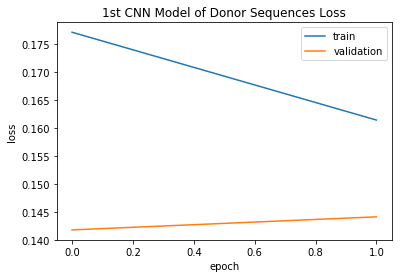

In [16]:
# summarize history for loss
plt.plot(donor_Vmodel_1_history.history['loss'])
plt.plot(donor_Vmodel_1_history.history['val_loss'])
plt.title('1st CNN Model of Donor Sequences Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

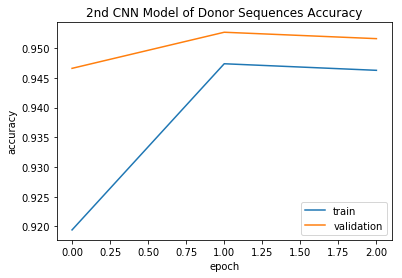

In [17]:
plt.plot(donor_Vmodel_2_history.history['acc'])
plt.plot(donor_Vmodel_2_history.history['val_acc'])
plt.title('2nd CNN Model of Donor Sequences Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

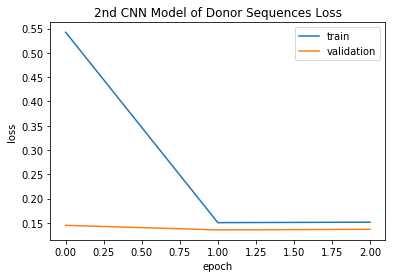

In [18]:
plt.plot(donor_Vmodel_2_history.history['loss'])
plt.plot(donor_Vmodel_2_history.history['val_loss'])
plt.title('2nd CNN Model of Donor Sequences Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

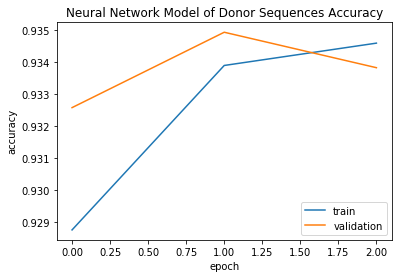

In [19]:
plt.plot(donor_Vmodel_3_history.history['acc'])
plt.plot(donor_Vmodel_3_history.history['val_acc'])
plt.title('Neural Network Model of Donor Sequences Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

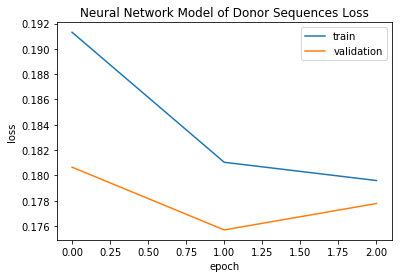

In [20]:
plt.plot(donor_Vmodel_3_history.history['loss'])
plt.plot(donor_Vmodel_3_history.history['val_loss'])
plt.title('Neural Network Model of Donor Sequences Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [21]:
# Testing 1st CNN model of Donor Sequence
y1_predict_classes = donor_Vmodel_1.predict_classes(xv_test)
print("1st CNN Model - Confusion matrix:\n{0}".format(metrics.confusion_matrix(yv_test, y1_predict_classes)))
# Precision and accuracy:
print("1st CNN Model - Classification report:\n{0}".format(metrics.classification_report(yv_test, y1_predict_classes)))
print("1st CNN Model - Classification accuracy: {0}".format(metrics.accuracy_score(yv_test, y1_predict_classes)))

1st CNN Model - Confusion matrix:
[[41785  2626]
 [ 1927 42920]]
1st CNN Model - Classification report:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95     44411
          1       0.94      0.96      0.95     44847

avg / total       0.95      0.95      0.95     89258

1st CNN Model - Classification accuracy: 0.948990566671895


In [22]:
# Testing 2nd CNN model of Donor Sequence
y2_predict_classes = donor_Vmodel_2.predict_classes(xv_test)
print("2nd CNN Model - Confusion matrix:\n{0}".format(metrics.confusion_matrix(yv_test, y2_predict_classes)))
# Precision and accuracy:
print("2nd CNN Model - Classification report:\n{0}".format(metrics.classification_report(yv_test, y2_predict_classes)))
print("2nd CNN Model - Classification accuracy: {0}".format(metrics.accuracy_score(yv_test, y2_predict_classes)))

2nd CNN Model - Confusion matrix:
[[41232  3179]
 [ 1304 43543]]
2nd CNN Model - Classification report:
             precision    recall  f1-score   support

          0       0.97      0.93      0.95     44411
          1       0.93      0.97      0.95     44847

avg / total       0.95      0.95      0.95     89258

2nd CNN Model - Classification accuracy: 0.9497748101010554


In [23]:
# Testing Neural Network model of Donor Sequence
y3_predict_classes = donor_Vmodel_1.predict_classes(xv_test)
print("Neural Network Model - Confusion matrix:\n{0}".format(metrics.confusion_matrix(yv_test, y3_predict_classes)))
# Precision and accuracy:
print("Neural Network Model - Classification report:\n{0}".format(metrics.classification_report(yv_test, y3_predict_classes)))
print("Neural Network Model - Classification accuracy: {0}".format(metrics.accuracy_score(yv_test, y3_predict_classes)))

Neural Network Model - Confusion matrix:
[[41785  2626]
 [ 1927 42920]]
Neural Network Model - Classification report:
             precision    recall  f1-score   support

          0       0.96      0.94      0.95     44411
          1       0.94      0.96      0.95     44847

avg / total       0.95      0.95      0.95     89258

Neural Network Model - Classification accuracy: 0.948990566671895


## Saving Models

In [24]:
donor_Vmodel_1.save('./Models/donor_Vmodel_1-1.hf5')
donor_Vmodel_2.save('./Models/donor_Vmodel_2-1.hf5')
donor_Vmodel_3.save('./Models/donor_Vmodel_3-1.hf5')